In [1]:
####################################################################
###    This is the PYTHON version of program 6.3 from page 202 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### This is a relatively simple stochastic model as only 2 events  #
### are possible: infection or recovery.						   #
### Note: by default we are using a very small population size 	   #
### to highlight the stochasticity.				   				   #
####################################################################

In [2]:
import numpy as np
import pylab as pl

*beta is the transmission rate and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.
*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.
*Y0 is the initial number of infectious individuals.
*N is the population size -- assumed to be constant.

In [3]:
beta=0.03
gamma=1/100.0
Y0=70.0
N0=100.0
ND=MaxTime=10*365.0;
INPUT = Y0
timestep=0.0

In [4]:
def stoc_eqs(INP,ts):  
	Z=INP
	Rate1 = beta*(N0-Z)*Z/N0
	Rate2 = gamma*Z
	R1=pl.rand()
	R2=pl.rand()
	ts = -np.log(R2)/(Rate1+Rate2)
	if R1<(Rate1/(Rate1+Rate2)):
		Z += 1;  # do infection
	else:
		Z -= 1;  # do recovery
	return [Z,ts]

In [5]:
def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	RES=[0]
	while T[lop] < ND and INPUT > 0:
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		T.append(T[lop-1]+ts)
		RES.append(INPUT)
		lop=lop+1
		T.append(T[lop-1])
		RES.append(res)
		INPUT=res
	return [RES, T]

In [6]:
[RES,t]=Stoch_Iteration(INPUT)

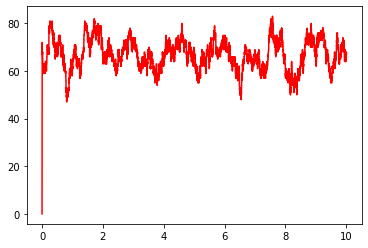

In [7]:
t=np.array(t)
RES=np.array(RES)
### plotting
pl.plot(t/365., RES, 'r')
pl.show()